2022 FIFA's Soccer World Cup

Dataset: https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Datasets

In [ ]:
# Load all datasets from folder

# Using glob to get all the csv files in the folder
path = "/content/drive/MyDrive/ML Projects/2022 World Cup/dataset"
csv_files = glob.glob(os.path.join(path, "*.csv")) 

# Dictionary with original datasets
d = {}

# Loop over the list of csv files
for file in csv_files:

    filename = (file.split("/")[-1]).split(".")[0]

    #Read the csv file
    d[filename] = pd.read_csv(file)

    #Print the file name and content
    print(filename)
    display(d[filename].tail())
    print()

world_cup_matches


,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
895,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),True
896,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,False
897,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,False
898,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,False
899,900,2018,2018/7/15,Final,France,4,2,Croatia,France,Croatia,NaN,False



2022_world_cup_matches


,ID,Year,Date,Stage,Home Team,Away Team,Host Team
59,60,2022,2022/12/10,Quarter-finals,W55,W56,NaN
60,61,2022,2022/12/13,Semi-finals,W57,W58,NaN
61,62,2022,2022/12/14,Semi-finals,W59,W60,NaN
62,63,2022,2022/12/17,Third place,L61,L62,NaN
63,64,2022,2022/12/18,Final,W61,W62,NaN



world_cups


,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
17,2006,Germany,Italy,France,Germany,Portugal,147.0,32,64
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145.0,32,64
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171.0,32,64
20,2018,Russia,France,Croatia,Belgium,England,169.0,32,64
21,2022,Qatar,NaN,NaN,NaN,NaN,NaN,32,64



international_matches


,ID,Tournament,Date,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Home Stadium
17764,17765,Friendly,2022/9/27,Qatar,2,2,Chile,NaN,NaN,NaN,False
17765,17766,Friendly,2022/9/27,Saudi Arabia,0,0,United States,NaN,NaN,NaN,False
17766,17767,UEFA Nations League,2022/9/27,Portugal,0,1,Spain,Spain,Portugal,NaN,True
17767,17768,UEFA Nations League,2022/9/27,Switzerland,2,1,Czech Republic,Switzerland,Czech Republic,NaN,True
17768,17769,UEFA Nations League,2022/9/27,Norway,0,2,Serbia,Serbia,Norway,NaN,True



2022_world_cup_groups


,Group,Team,FIFA Ranking
27,G,Cameroon,43
28,H,Portugal,9
29,H,Ghana,61
30,H,Uruguay,14
31,H,South Korea,28



data_dictionary


,Table,Field,Description
33,international_matches,Home Goals,Goals scored by the home team
34,international_matches,Away Goals,Goals scored by the away team
35,international_matches,Away Team,Country playing as the away team
36,international_matches,Win Conditions,Was the match decided by penalties?
37,international_matches,Home Stadium,TRUE whenever the game took place in the home ...


# Data Exploration

## Analysis on **world_cups** Dataset

In [ ]:
df_world_cups = d['world_cups']
df_world_cups.tail()

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
17,2006,Germany,Italy,France,Germany,Portugal,147.0,32,64
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145.0,32,64
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171.0,32,64
20,2018,Russia,France,Croatia,Belgium,England,169.0,32,64
21,2022,Qatar,NaN,NaN,NaN,NaN,NaN,32,64


In [ ]:
#Handling null values
pd.isnull(df_world_cups).sum()

Year               0
Host Country       0
Winner             1
Runners-Up         1
Third              1
Fourth             1
Goals Scored       1
Qualified Teams    0
Matches Played     0
dtype: int64

In [ ]:
empty_str_cols = ['Winner','Runners-Up','Third','Fourth']
for col in empty_str_cols:
    df_world_cups[col] = df_world_cups[col].fillna('TBD')

df_world_cups['Goals Scored'] = df_world_cups['Goals Scored'].fillna(0)

df_world_cups

,Year,Host Country,Winner,Runners-Up,Third,Fourth,Goals Scored,Qualified Teams,Matches Played
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,13,18
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70.0,16,17
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,15,18
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,13,22
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140.0,16,26
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126.0,16,35
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89.0,16,32
7,1966,England,England,Germany FR,Portugal,Soviet Union,89.0,16,32
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95.0,16,32
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97.0,16,38


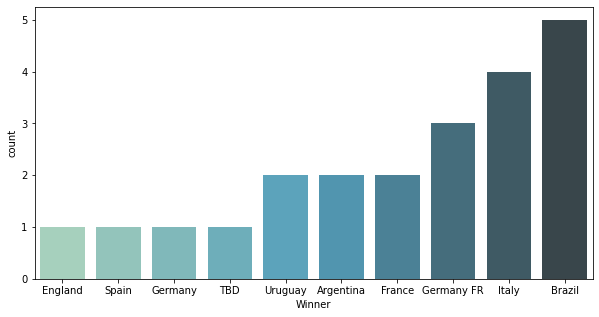

In [ ]:
# Number of times each country won the cup

plt.figure(figsize=(10,5))
sns.countplot(
    data = df_world_cups,
    x = 'Winner',
    order = df_world_cups.Winner.value_counts(ascending=True).index,
    palette = "GnBu_d"
)
plt.show()

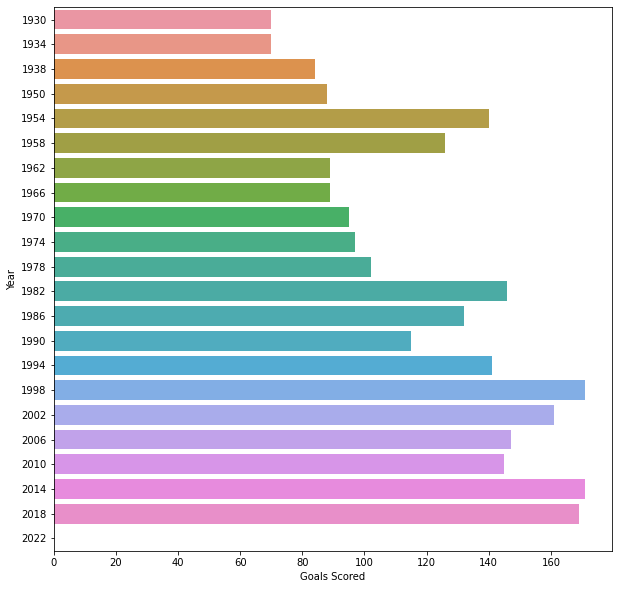

In [ ]:
# Sum of goals scored per year

plt.figure(figsize=(10,10))
sns.barplot(
    data = df_world_cups,
    x = 'Goals Scored', 
    y = df_world_cups.Year.astype(str)
)
plt.show()


From the chat above, we can see a growth trend in goals scored per cup, and by using the gradient, I will group the years in periods of 7 cups to analyze outliers.

In [ ]:
# Grouping up

df_world_cups2 = df_world_cups[['Year','Goals Scored']].copy()

# Remove the 2022 cup, otherwise it would be alone in a new group
df_world_cups2.drop(21, inplace=True)

df_world_cups2.insert(0,'Era','')
df_world_cups2['Era'] = np.where(
    df_world_cups2['Year'] <= 1962, 
    1, 
    np.where(
        (df_world_cups2['Year'] >= 1962) & (df_world_cups2['Year'] <= 1990), 
        2, 
        3
    )
)

df_world_cups2

,Era,Year,Goals Scored
0,1,1930,70.0
1,1,1934,70.0
2,1,1938,84.0
3,1,1950,88.0
4,1,1954,140.0
5,1,1958,126.0
6,1,1962,89.0
7,2,1966,89.0
8,2,1970,95.0
9,2,1974,97.0


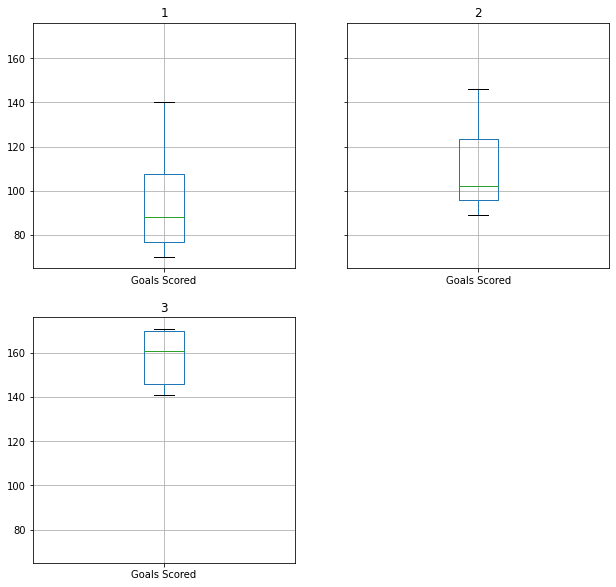

In [ ]:
# Box-Plot analysis

df_world_cups2.groupby("Era").boxplot(column="Goals Scored", figsize=(10,10));

Surprisingly enough, the '54 and the '82 cups were **not** considered outliers inside their respective groups

In [ ]:
# Influence of playing home

df_world_cups2 = df_world_cups[['Host Country','Winner','Runners-Up','Third']].copy()

# Renaming columns
df_world_cups2.rename(
    columns={
        'Host Country': 'Host', 
        'Winner': 'First', 
        'Runners-Up' : 'Second'
    }, 
    inplace=True
)

# Check if final placement equals host

for col in ['First','Second','Third']:
    df_world_cups2[col] = np.where(df_world_cups2['Host'] == df_world_cups2[col], 1, 0)

# New row summarizing columns
df_world_cups2.append(df_world_cups2.sum(numeric_only=True).rename('Total'))

,Host,First,Second,Third
0,Uruguay,1.0,0.0,0.0
1,Italy,1.0,0.0,0.0
2,France,0.0,0.0,0.0
3,Brazil,0.0,1.0,0.0
4,Switzerland,0.0,0.0,0.0
5,Sweden,0.0,1.0,0.0
6,Chile,0.0,0.0,1.0
7,England,1.0,0.0,0.0
8,Mexico,0.0,0.0,0.0
9,Germany,0.0,0.0,0.0


Throughout 20 cups, the hosting country:
- went 10 times to the podium (50%)
- won first place 5 times (25%)

## Analysis on **world_cup_matches** Dataset

In [ ]:
df_world_cup_matches = d['world_cup_matches']
df_world_cup_matches.tail(10)

,ID,Year,Date,Stage,Home Team,Home Goals,Away Goals,Away Team,Winning Team,Losing Team,Win Conditions,Host Team
895,896,2018,2018/7/7,Quarter-finals,Russia,2,2,Croatia,NaN,NaN,Croatia win on penalties (3 - 4),True
896,897,2018,2018/7/10,Semi-finals,France,1,0,Belgium,France,Belgium,NaN,False
897,898,2018,2018/7/11,Semi-finals,Croatia,2,1,England,Croatia,England,Extra time,False
898,899,2018,2018/7/14,Third place,Belgium,2,0,England,Belgium,England,NaN,False
899,900,2018,2018/7/15,Final,France,4,2,Croatia,France,Croatia,NaN,False
